In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [81]:
df= train_values.merge(train_labels, on='building_id')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [82]:
def convert(df):
    string_columns = [i for i, dtype in enumerate(df.dtypes) if dtype == 'object']

    # Chuyển đổi các giá trị string thành số nguyên
    label_encoders = []
    for col in string_columns:
        label_encoder = LabelEncoder()
        df.iloc[:, col] = label_encoder.fit_transform(df.iloc[:, col])
        label_encoders.append(label_encoder)

convert(df)

In [83]:
df.iloc[:,1:].describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [84]:
# for c in df.columns[1:]:
#     df.boxplot(c,by='damage_grade',figsize=(7,4),fontsize=14)
#     plt.title("{}\n".format(c),fontsize=16)
#     plt.xlabel("Damage Grade", fontsize=16)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
X = df.drop('damage_grade',axis=1)
y = df['damage_grade']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [87]:
dfx.head(10)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0.910312,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,0.437580,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
1,-1.631438,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.999121,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
2,-1.414337,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0.437580,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
3,0.214112,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0.437580,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
4,-1.063003,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,0.437580,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
5,-0.632602,-0.734459,-0.346671,-0.046314,-0.178274,-0.224765,0.223565,-0.226419,0.437580,-0.205535,...,3.812247,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
6,0.665832,-0.609982,-0.547781,1.592854,-0.178274,-0.020866,-1.142486,-0.747683,-2.435822,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
7,-0.164707,0.759267,-0.916078,1.639476,-0.178274,-0.360698,-0.004110,0.294845,0.437580,3.247783,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
8,-0.277626,-1.730277,0.135508,0.263584,-0.178274,-0.156799,-0.004110,0.294845,0.437580,-0.205535,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
9,1.523011,1.506130,0.448076,-1.443596,-1.552536,-0.360698,1.134266,-0.747683,0.437580,-1.932194,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731


In [88]:
dfx.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,...,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05
mean,-1.209363e-16,-5.731217e-17,8.795864e-17,-3.315490e-17,-1.102210e-16,-9.052160e-18,4.624236e-17,2.088540e-16,3.817176e-19,7.198103e-18,...,-6.205637e-17,2.917413e-17,-3.926238e-17,-1.057903e-17,-1.161512e-17,-3.926238e-18,1.308746e-18,5.098656e-18,-3.053741e-18,-3.010116e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.726091e+00,-1.730277e+00,-1.698710e+00,-1.716197e+00,-1.552536e+00,-3.606979e-01,-1.597836e+00,-1.790210e+00,-2.435822e+00,-3.658853e+00,...,-2.623125e-01,-1.865373e-01,-9.036958e-02,-3.067604e-02,-1.899565e-02,-3.273759e-02,-1.371358e-02,-1.207634e-02,-9.394962e-03,-7.173057e-02
25%,-8.684628e-01,-8.589365e-01,-8.506572e-01,-8.734392e-01,-1.782737e-01,-2.247652e-01,-6.871352e-01,-7.476826e-01,4.375802e-01,-2.055352e-01,...,-2.623125e-01,-1.865373e-01,-9.036958e-02,-3.067604e-02,-1.899565e-02,-3.273759e-02,-1.371358e-02,-1.207634e-02,-9.394962e-03,-7.173057e-02
50%,2.676694e-04,-2.365506e-01,2.242047e-03,3.324917e-03,-1.782737e-01,-1.567988e-01,-2.317848e-01,-2.264188e-01,4.375802e-01,-2.055352e-01,...,-2.623125e-01,-1.865373e-01,-9.036958e-02,-3.067604e-02,-1.899565e-02,-3.273759e-02,-1.371358e-02,-1.207634e-02,-9.394962e-03,-7.173057e-02
75%,8.671527e-01,8.837440e-01,8.454493e-01,8.650055e-01,-1.782737e-01,4.710030e-02,2.235655e-01,2.948449e-01,4.375802e-01,-2.055352e-01,...,-2.623125e-01,-1.865373e-01,-9.036958e-02,-3.067604e-02,-1.899565e-02,-3.273759e-02,-1.371358e-02,-1.207634e-02,-9.394962e-03,-7.173057e-02
max,1.731303e+00,2.004039e+00,1.758924e+00,1.730251e+00,9.441562e+00,1.316461e+01,2.094201e+01,1.384770e+01,4.375802e-01,3.247783e+00,...,3.812247e+00,5.360857e+00,1.106567e+01,3.259874e+01,5.264362e+01,3.054593e+01,7.292042e+01,8.280653e+01,1.064400e+02,1.394106e+01


In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=3)

In [91]:
dfx_pca = pca.fit(dfx)

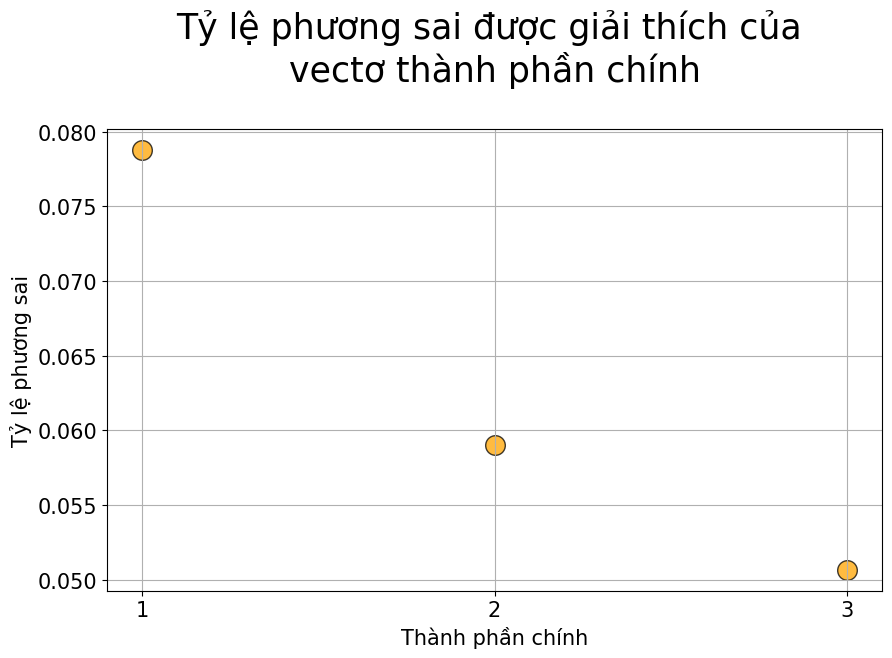

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Tỷ lệ phương sai được giải thích của \nvectơ thành phần chính\n",fontsize=25)
plt.xlabel("Thành phần chính",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Tỷ lệ phương sai",fontsize=15)
plt.show()

In [93]:
dfx_trans = pca.transform(dfx)

In [94]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2
0,-1.027080,-0.939980,-0.162262
1,0.029727,-0.362238,0.426108
2,-1.023262,-0.437856,0.180187
3,-1.154875,0.328039,-1.502269
4,1.540638,-2.487111,-1.840959
5,-0.121272,-0.381905,3.526242
6,-0.835686,0.432652,0.618973
7,2.478415,3.244092,-2.714492
8,-0.507815,-0.383288,-0.008593
9,1.450473,2.735824,0.019649


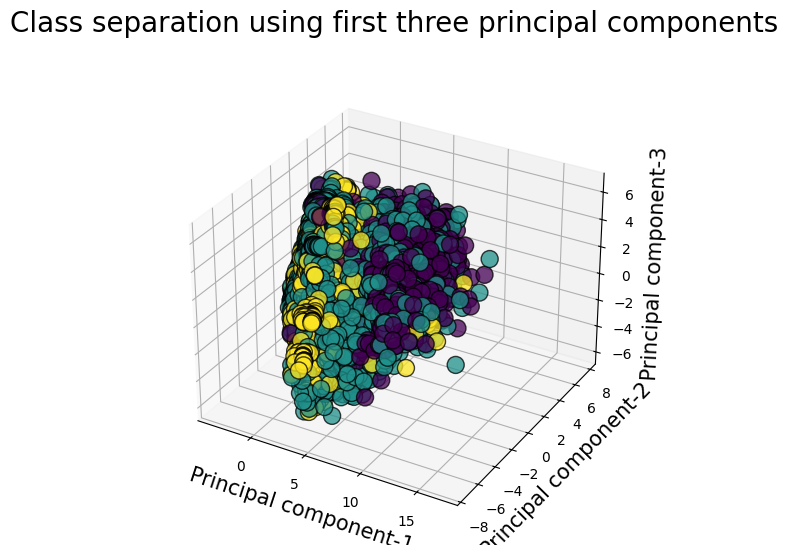

In [95]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  # Tạo subplot 3D

# Giả sử dfx_trans[2] là thành phần thứ ba bạn muốn hiển thị
ax.scatter(dfx_trans[0], dfx_trans[1], dfx_trans[2], c=df['damage_grade'], edgecolors='k', alpha=0.75, s=150)

ax.grid(True)
ax.set_title("Tách lớp bằng ba thành phần chính đầu tiên\n", fontsize=20)
ax.set_xlabel("Principal component-1", fontsize=15)
ax.set_ylabel("Principal component-2", fontsize=15)
ax.set_zlabel("Principal component-3", fontsize=15)  # Nhãn cho trục z

plt.show()